In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline  
data=pd.read_csv("dataset/down_data.csv")
data.shape

(61, 3)

In [2]:
y=data['2'] # length
x=data["3"] # Resistance
x1=[]
y1=[]
x2=[]
x3=[]
for i in range(60):
    x1.append(x[i]*0.1) 
    y1.append(y[i])
    x2.append((x[i]**2)*0.0001) # 2차 함수 : 0.0001(down)
    x3.append((x[i]**3)*0.00000001)
W1=tf.Variable(tf.random_normal([1]),name='weight1')
W2=tf.Variable(tf.random_normal([1]),name='weight2')
W3=tf.Variable(tf.random_normal([1]),name='weight3')
B=tf.Variable(tf.random_normal([1]),name='bias')
X1=tf.placeholder(tf.float32)
X2=tf.placeholder(tf.float32)
X3=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

In [3]:
hypothesis=B+X1*W1
cost=tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000000001) # 1차 함수 :0.000000001down)
train=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [4]:
for step in range(10000): # 1차함수 만번(down)
    cost_val, hy_val, _,w1,b = sess.run([cost, hypothesis, train,W1,B],
                                   feed_dict={X1:x1, Y:y1})
    if step % 500 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val,"\nW1:{},B:{}".format(w1,b))

0 Cost:  11719969.0 
Prediction:
 [-6162.915   -6013.444   -5892.2207  -5797.346   -5704.2803  -5612.977
 -5349.138   -5392.095   -5327.8076  -5222.601   -5079.261   -4862.8477
 -4882.092   -4767.8696  -4620.086   -4548.0625  -4390.342   -4271.663
 -4140.097   -3997.03    -3874.0413  -3740.1477  -3639.1372  -3472.01
 -3377.8738  -3234.6804  -3109.2737  -3012.0518  -2929.16    -2791.553
 -2670.1602  -2542.6238  -2419.9036  -2282.4705  -2150.841   -2033.4941
 -1912.0657  -1787.3146  -1667.7631  -1538.1564  -1421.5165  -1289.2866
 -1169.885   -1062.004    -958.57556  -870.8003   -819.6214   -814.0033
  -797.22424  -786.10266  -780.5636   -780.5636   -775.03644  -775.03644
  -769.5211   -769.5211   -758.5299   -764.0176   -764.0176   -764.0176 ] 
W1:[-0.39508167],B:[0.3587718]
500 Cost:  0.17338927 
Prediction:
 [6.728299  6.573827  6.448548  6.3504987 6.254319  6.1599607 5.887294
 5.9316883 5.8652496 5.756523  5.6083875 5.384733  5.404621  5.286577
 5.1338487 5.0594153 4.896418  4.7737684

6000 Cost:  0.17338927 
Prediction:
 [6.728299  6.573827  6.448548  6.3504987 6.254319  6.1599607 5.887294
 5.9316883 5.8652496 5.756523  5.6083875 5.384733  5.404621  5.286577
 5.1338487 5.0594153 4.896418  4.7737684 4.6378    4.4899464 4.3628426
 4.224469  4.120079  3.94736   3.850074  3.7020895 3.5724869 3.4720123
 3.3863468 3.2441356 3.1186812 2.9868777 2.8600514 2.71802   2.5819867
 2.4607131 2.3352218 2.206297  2.082745  1.9488021 1.8282596 1.6916054
 1.5682089 1.4567183 1.3498293 1.2591172 1.2062259 1.2004199 1.1830795
 1.1715858 1.1658614 1.1658614 1.1601492 1.1601492 1.1544495 1.1544495
 1.1430905 1.1487617 1.1487617 1.1487617] 
W1:[0.0004083],B:[0.35881042]
6500 Cost:  0.17338927 
Prediction:
 [6.728299  6.573827  6.448548  6.3504987 6.254319  6.1599607 5.887294
 5.9316883 5.8652496 5.756523  5.6083875 5.384733  5.404621  5.286577
 5.1338487 5.0594153 4.896418  4.7737684 4.6378    4.4899464 4.3628426
 4.224469  4.120079  3.94736   3.850074  3.7020895 3.5724869 3.4720123
 3.38

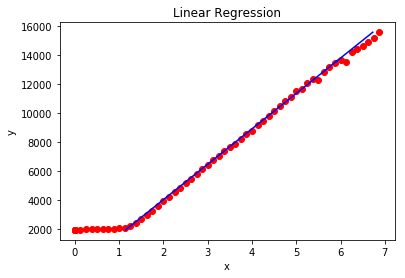

In [5]:
# W1:[0.00108227],B:[1.1958917]

plt.figure(1)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
# 주어진 데이터들을 점으로 표시
plt.plot(y1,x1, 'ro')
# 예측한 일차함수를 직선으로 표시
plt.plot(sess.run(B)+x1*sess.run(W1),x1, 'b')
# X=5 일때의 계산 값
plt.show()